<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Регрессия---моя-профессия" data-toc-modified-id="Регрессия---моя-профессия-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия - моя профессия</a></span><ul class="toc-item"><li><span><a href="#Данные" data-toc-modified-id="Данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Данные</a></span></li><li><span><a href="#Вопросы" data-toc-modified-id="Вопросы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вопросы</a></span></li></ul></li><li><span><a href="#Парная-регрессия-в-уровнях" data-toc-modified-id="Парная-регрессия-в-уровнях-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Парная регрессия в уровнях</a></span></li><li><span><a href="#Парная-регрессия-в-логарифмах" data-toc-modified-id="Парная-регрессия-в-логарифмах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Парная регрессия в логарифмах</a></span></li><li><span><a href="#Множественная-регрессия" data-toc-modified-id="Множественная-регрессия-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Множественная регрессия</a></span></li><li><span><a href="#Проверка-предпосылок-модели" data-toc-modified-id="Проверка-предпосылок-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка предпосылок модели</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></div>

#  Регрессия - моя профессия

В этой тетрадке мы попробуем найте BLUE-оценки и проверить пару гипотез. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats 

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Данные

In [2]:
df = pd.read_csv('./data/Advertising.csv', index_col=0)
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


__Описание колонок:__ 

- `Sales` - продажи продукта на данном рынке (в тысячах штук) 
- `TV` -  доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- `Radio` - доллары, потраченные на радио рекламу
- `Newspaper` - доллары, потраченные на рекламу в газетах

В нашей выборке мы имеем 200 **наблюдений** (200 разных рынков с разным объёмом рекламы)

## Вопросы

Давайте представим, что мы работаем на компанию, которая производит и продает этот товар. Компания может задать нам вопрос: как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:

1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке, можем ли мы предсказать продажи?

# Парная регрессия в уровнях

Взглянем как продажи зависят от типов рекламы.

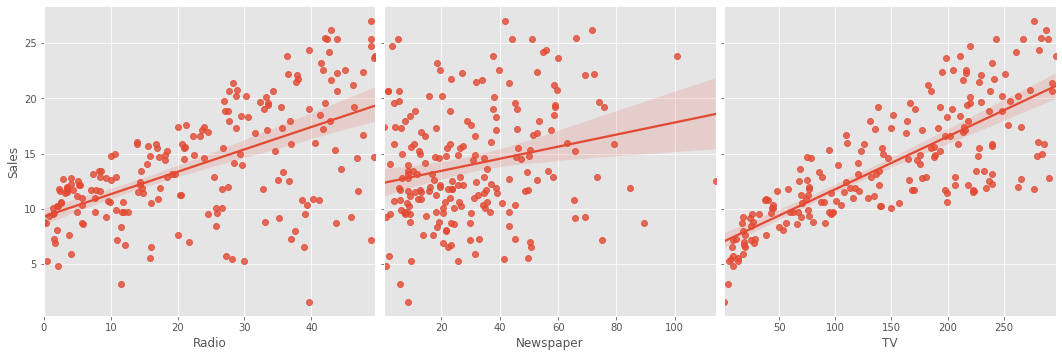

In [3]:
sns.pairplot(
    df, 
    y_vars='Sales', 
    x_vars=['Radio', 'Newspaper', 'TV'], 
    height=5,
    kind='reg',
    diag_kind=None
);

In [4]:
df.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

Для начала давайте поговорим только про рекламу на TV. Оценим параметры модели 

$$
Sales_i = \beta_0 + \beta_1 \cdot TV_i + \varepsilon_i
$$

In [5]:
import statsmodels.formula.api as smf

model = smf.ols('Sales ~ TV', data=df, )
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        22:10:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [6]:
res.params

Intercept    7.032594
TV           0.047537
dtype: float64

- p_value<0.05 -> $H_0: \beta = 0$ -> отвергается - коэффициент значим, коэффициент НЕ равен 0
- p_value>0.05 -> $H_0: \beta = 0$ -> НЕ отвергается - коэффициент НЕ значим, коэффициент равен 0

- Переменная $TV$ значима, так как $p$-значение для проверки гипотезы о том, что она равна нулю оказалось очень маленьким, наблюдаемое значение статистики $17.668$. Оно лежит глубоко в хвосте нашего распределения. 
- Получившееся уравнение 

$$
Sales_i = 7.033 + 0.047 \cdot TV_i
$$

можно проинтерпретировать так, что каждые дополнительные $1000$ долларов, потраченные на рекламу по телевизору, увеличивают продажы на $47.537$ товаров.

> Мы можем так интерпретировать значение коэффициента, если выполняются предпослыки линейной регрессии. Например, первая предпослыка говорит о том, что мы должны были верно специфицировать модель. 

Если модель специфицирована неверно, у нас есть проблемы. 

> Мы получаем корректные оценки стандартных ошибок в ситуации, когда ошибки независимо одинаково распределены с одинаковой дисперсией. Если это не так, оценки ошибок искажены. 

- Информационные критерии
    - [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion):
    $\mathrm{AIC} \, = \, 2k - 2\ln(\hat L)$
    - [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion):
    $\mathrm{BIC} = k\ln(n) - 2\ln(\widehat L)$
- Коэффициенты детерминации
    - $ R^2 = 1-{RSS \over TSS}$
    - $ R^2_\text{adj} = 1-{RSS/(n-k-1) \over TSS/(n-1)}$

# Парная регрессия в логарифмах

У нашей модели явно есть проблемы со спецификацией. Давайте попробуем их исправить. Если взглянуть на график того, как между собой взаимосвязаны реклама по TV и продажи, можно заметить нелинейную зависимость, похожую на логарифмическую. 

- при увеличении инвестиций в ТВ, разброс продаж увеличивается (гетероскедастичность)

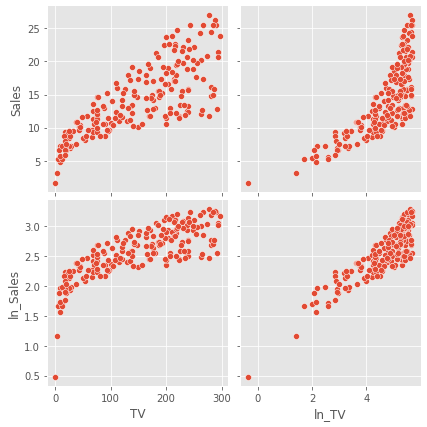

In [7]:
df['ln_TV'] = df['TV'].apply(np.log)
df['ln_Sales'] = df['Sales'].apply(np.log)


sns.pairplot(
    df, 
    y_vars=['Sales', 'ln_Sales'], 
    x_vars=['TV', 'ln_TV'], 
    height=3,
    diag_kind=None,
);


Очистим данные от выбросов. 

In [8]:
df = df[df.Sales > df.Sales.quantile(0.01)]

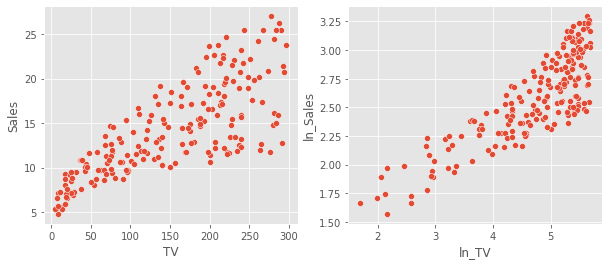

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.scatterplot(data=df, x='TV', y='Sales');

plt.subplot(122)
sns.scatterplot(data=df, x='ln_TV', y='ln_Sales');

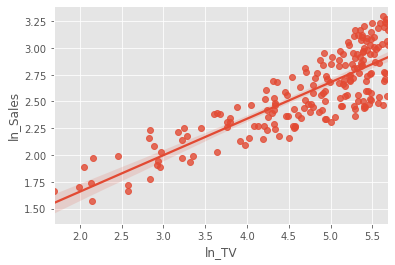

In [10]:
sns.regplot(data=df, x='ln_TV', y='ln_Sales');

Оценим параметры модели 

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \varepsilon_i
$$

In [11]:
import statsmodels.formula.api as smf

model = smf.ols('ln_Sales ~ ln_TV', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.16e-51
Time:                        22:10:10   Log-Likelihood:                 29.332
No. Observations:                 198   AIC:                            -54.66
Df Residuals:                     196   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9757      0.078     12.443      0.0

Переменная снова значима. $R^2$ подрос. Все коэффициенты в моделях, где целевые и объясняющие переменные взяты в логарифмах, интерпретируются в процентных изменениях. Например, коэффициент $0.3550$ можно проинтерпретировать как то, на сколько процентов увеличутся продажи, при изменении трат на рекламу по телевизору на $1\%$. 

![](https://www.kdnuggets.com/wp-content/uploads/r-glm-table-1.png)

# Множественная регрессия

Оценим уравнение 

$$
\ln Sales_i = \beta_0 + \beta_1 \cdot \ln TV_i + \beta_2 \cdot Radio_i + \beta_3 \cdot Newspaper_i + \varepsilon_i
$$

In [12]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data=df)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2959.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.17e-161
Time:                        22:10:10   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.022     30.446      0.0

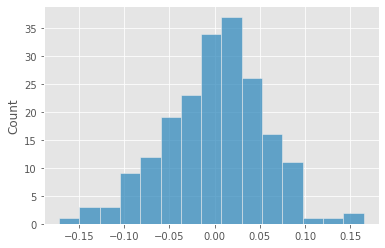

In [13]:
sns.histplot(res.resid);

In [14]:
import scipy.stats as ss

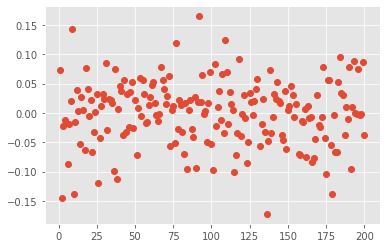

In [15]:
plt.plot(res.resid, 'o');

- Уравнение значимо в целом, значение F-статистики попадает глубоко в хвост 
- Коэффициент перед `Newspaper` отрицательный и незначимый

> Если модель специфицирована верно и выполнены все предпосылки, мы можем сделать вывод, что траты на рекламу в газетах никак не повышают продажи и от них можно отказаться 

# Проверка предпосылок модели

- Есть ли мультиколинеарность? 

In [16]:
df[['ln_TV', 'Radio', 'Newspaper']].corr()

,ln_TV,Radio,Newspaper
ln_TV,1.000000,0.004521,-0.004387
Radio,0.004521,1.000000,0.358916
Newspaper,-0.004387,0.358916,1.000000


Между переменными нет высокой корреляции. Значит у нас получится корректно оценить нашу модель. Есть другие, более формальне критерии для поиска проблем, связанных с мультиколинеарностью, но мы про них говорить не будем. 

- Корректны ли данные, с которыми мы работаем, для решения поставленной задачи? 
- Корректна ли спецификация модели? 
- Есть ли выборосы? 

Про всё это мы поговорили выше. Судя по всему, оценки коэффициентов, которые мы получили - несмещённые и состоятельные. 

- Есть ли в остатках __автокоррелированность__?

Для проверки этой предпосылки нам достаточно посмотреть в протокол оценивания и найти там строчку `Durbin-Watson`. Это статистика Дарбина-Уотсона. Если она оказывается в районе двух, то автокоррелированности в остатках нет. На самом деле это тоже статистика и для неё есть формальные критические значения, но мы в это углубляться не будем. Есть и другие критерии для проверки этой предпосылки. 

- Есть ли в остатках __гетероскедастичность__?

Для гетероскедастичности построим картинку и воспользуемся каким-нибудь критерием. 

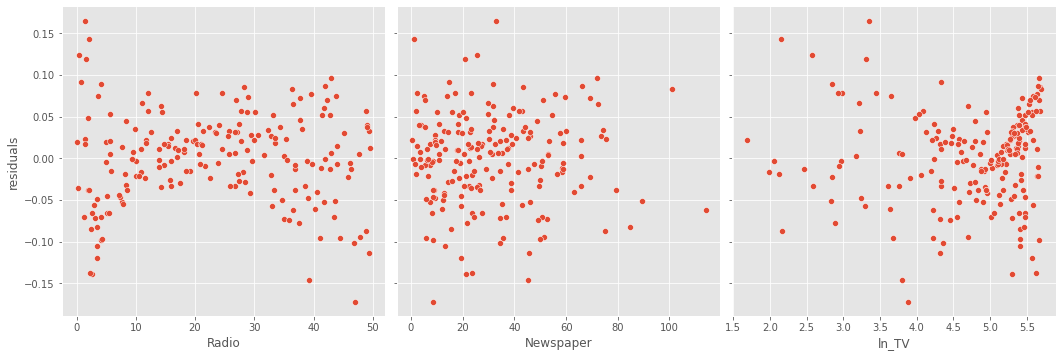

In [17]:
df['residuals'] = res.resid

sns.pairplot(
    df, 
    y_vars='residuals', 
    x_vars=['Radio', 'Newspaper', 'ln_TV'], 
    height=5,
    diag_kind=None
);

Судя по графику, дисперсия ошибок зависит от объёма рекламы по радио. Причём квадратично. Выходит, что оценки дисперсий коэффициентов искажены и доверительные интервалы оказываются смещёнными. Можно провести формальный тест на гомоскедастичность. Таких тестов есть довольно много. 

In [18]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(res.resid, df[['ln_TV', 'Radio', 'Newspaper']].values)

(51.35841835091103,
 7.041434689102253e-12,
 22.765010819357567,
 1.1142274879410336e-12)

Видим, что `pvalue` (последнее значение) сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается. Можно ввести корректировку и исправить значения ошибок прямо при оценивании модели. 

In [19]:
model = smf.ols('ln_Sales ~ ln_TV + Radio + Newspaper', data=df)
res = model.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.85e-141
Time:                        22:10:12   Log-Likelihood:                 294.22
No. Observations:                 198   AIC:                            -580.4
Df Residuals:                     194   BIC:                            -567.3
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6661      0.029     23.108      0.0

Значения стандартных ошибок довольно сильно изменились. Теперь мы можем использовать их для проверки гипотез. 

> Нормальность остатков нам не нужна. Из-за корректировки ошибок мы можем пользоваться только асимптотическими результатами. В данных нет выбросов, поэтому предельные теоремы тут работают. 

## Выводы

1. Тратить деньги на рекламу в газетах неэффективно. Гипотеза о том, что коэффициент перед этой переменной равен нулю, не отвергается. 
2. Реклама по телевидению обладает убывающей отдачей от масштаба. Коэффициент перед логарифмом получился меньше единицы. Этот канал оказывается в плане рекламы самым эффективным. 
3. Канал, связанный с радио, судя по всему, недоиспользуется. Здравый смысл и микроэкономика подсказывают, что от него тоже логично ожидать убывающую от масштаба отдачу. Однако в данных мы видим, что она линейная. 

# Логистическая регрессия

In [20]:
from statsmodels.discrete.discrete_model import Logit

In [21]:
df['const'] = 1 
df['Sales_binary'] = (df.ln_Sales > df.ln_Sales.mean())*1

y = df['Sales_binary']
X = df[['const','ln_TV','Newspaper','Radio']]

In [22]:
model = Logit(endog=y, exog=X)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.063225
         Iterations 12


In [23]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Sales_binary   No. Observations:                  198
Model:                          Logit   Df Residuals:                      194
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                  0.9087
Time:                        22:10:12   Log-Likelihood:                -12.518
converged:                       True   LL-Null:                       -137.08
Covariance Type:            nonrobust   LLR p-value:                 1.011e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -100.2938     29.327     -3.420      0.001    -157.773     -42.815
ln_TV         17.3584      5.096      3.407      0.001       7.371      27.346
Newspaper     -0.0076      0.023     -0.326      0.745      -0.053       0.038
Radio          0.7056      0.198      3.569      0.000       0.318       1.093
==============================================================================

Possibly complete quasi-separation: A fraction 0.62 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""